# TP4 : Apprentissage non supervisé
    cours: Master SIAD
    date: 25.10.2019
    @: vasseur.corentin@gmail.com

In [26]:
import pandas as pd
import numpy as np 
from numpy import newaxis
from sklearn.cluster import KMeans, DBSCAN, OPTICS

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
def load_dataset():
    """ chargement des données
    """
    d1 = np.random.randn(100,3) + [3,3,3]  # génération 100 points 3D suivant loi normale centrée en [3,3,3]
    d2 = np.random.randn(100,3) + [-3,-3,-3]
    d3 = np.random.randn(100,3) + [-3,3,3]
    d4 = np.random.randn(100,3) + [-3,-3,3]
    d5 = np.random.randn(100,3) + [3,3,-3]

    data = np.concatenate((d1,d2,d3,d4,d5))  # concaténation des données dans une matrice
    np.random.shuffle(data) 
    return data

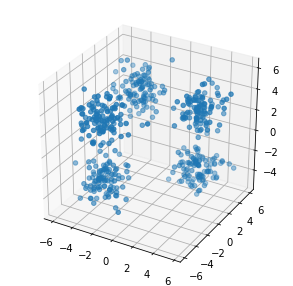

In [3]:
data = load_dataset()

# plot 3d
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2])
plt.show()

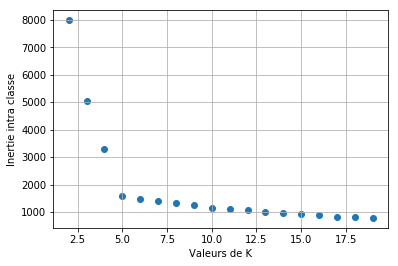

In [9]:
# Elbow/Knee method: déterminer le nombre de cluster à l'aide de l'inertie intra-classe

a=[]
nbK = 20
for i in range(2,nbK):
    kmeans = KMeans(n_clusters=i) 
    kmeans.fit(data[:,:3]) 
    a.append(kmeans.inertia_)
plt.scatter(range(2,nbK),a)
plt.xlabel('Valeurs de K')
plt.ylabel('Inertie intra classe')
plt.grid(True)

## Différentes méthodes d'initialisation : impact

In [15]:
# initialisation par kmeans++ vs initialisation random
kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data[:,:3])
print('>> kmeans++:', kmeans.inertia_)

kmeans = KMeans(n_clusters=5, n_init=1, init='random').fit(data[:,:3])
print('>> random: ', kmeans.inertia_)
kmeans = KMeans(n_clusters=5, n_init=1, init='random').fit(data[:,:3])
print('>> random: ', kmeans.inertia_)

>> kmeans++: 1585.8886729467608
>> random:  1585.8886729467608
>> random:  3242.5009856797847


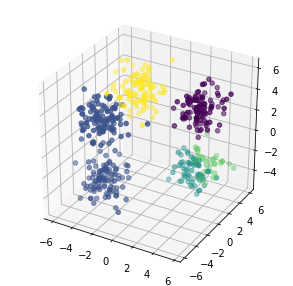

In [16]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=kmeans.labels_)
plt.show()

# 2. Jeu de données 2 : MULTISHAPES 

## 2.1. Kmeans

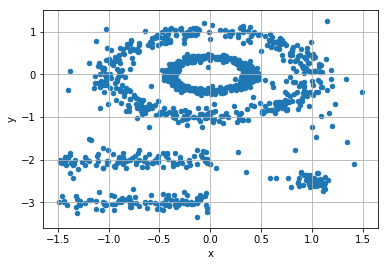

In [23]:
# les données

df = pd.read_csv('./multishapes.csv')
del df['Unnamed: 0']
df.plot.scatter(x='x',y='y')
plt.grid(True)

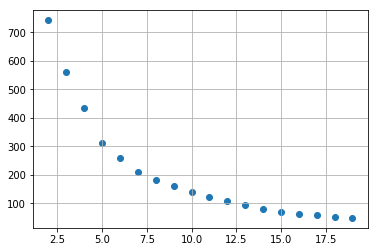

In [24]:
# Elbow method: déterminer le nombre de cluster à l'aide de l'inertie intra-classe
a=[]
nbK = 20
for i in range(2,nbK):
    kmeans = KMeans(n_clusters=i, n_init=10, init='k-means++') 
    kmeans.fit(df[['x','y']]) 
    a.append(kmeans.inertia_)
plt.scatter(range(2,nbK),a)
plt.grid(True)

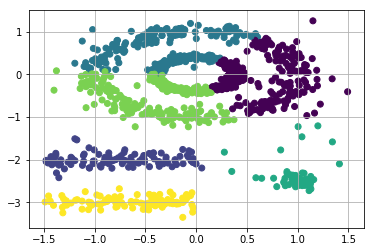

In [25]:
# un example pour K=6

kmeans = KMeans(
                n_clusters=6,
                n_init=10,
                init='k-means++'
                )\
                .fit(df[['x','y']]) 
plt.scatter(df['x'],df['y'],c=kmeans.labels_)
plt.grid(True)

## 2.2 DBSCAN / OPTICS

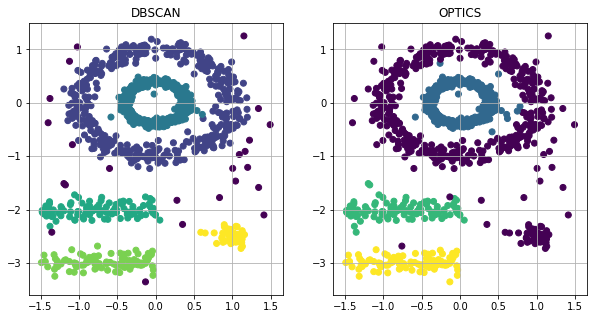

In [117]:
dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan.fit(df[['x','y']])
clust  = OPTICS()
clust.fit(df[['x','y']])

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(df['x'],df['y'],c=dbscan.labels_)
ax[0].set_title('DBSCAN')

ax[1].scatter(df['x'],df['y'],c=optics.labels_)
ax[1].set_title('OPTICS')

ax[0].grid(True)
ax[1].grid(True)